# Data Gathering & Cleaning
#### Evaluating Multi-Disease Interventions - MSc Engineering and Policy Analysis

Shannon M. Gross


In [2]:
import pandas as pd
import geopandas as gpd 
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
%matplotlib inline
pd.options.display.max_columns = 100

## Retrieve data sources

In [ ]:
# df_main = pd.read_excel('df_district_data.xlsx', sheet_name='DistrictData')

## Data cleaning
- clean district names

In [ ]:
# df_main = pd.read_excel(r'C:\Users\sgross\Documents\disease_model\maps\df_district_data.xlsx', sheet_name='DistrictData')
# # Create a dictionary to replace the incorrect entries with right ones (ISO?)
# replace_districts = {'Bukwa' : 'Bukwo', 
#                      'Bukomansibi':'Bukomansimbi',
#                      'Sembabule':'Ssembabule',
#                      'Kyotera':'Kyotara'
#                     }                                                                                          

# df_main = df_main.replace({"District": replace_districts})  

# # Shapefile from UBOS http://ubos.geo-solutions.it/layers/geonode:uganda_districts_2018
# countries_gdf = gpd.read_file(r".\maps\uganda_districts_2018\uganda_districts_2018.shp")

# countries_gdf['DNama2017'] = countries_gdf['DNama2017'].str.capitalize()
# countries_gdf['F15Regions'] = countries_gdf['F15Regions'].str.capitalize()
# countries_gdf = countries_gdf[['DNama2017','F15Regions','TotalPopn','geometry']]
    
# ## Test District Name Matching
# districts_geo = countries_gdf['DNama2017']
# districts_main = df_main['District']

# iso_districts = set(districts_main)
# temp = [x for x in districts_geo if x not in iso_districts]

# ## Combine shapefiles, Main
# df_main= df_main.drop(columns=['Unnamed: 0',
#                      'Subdivision category',
#                      '3166-2 code'])

# districts_gdf = countries_gdf.merge(df_main, left_on='DNama2017', right_on='District', how='left')

# gdf_district_data = districts_gdf.copy()
# gdf_district_data = gdf_district_data.drop(columns=['geometry'])

# with pd.ExcelWriter('gdf_district_data.xlsx') as writer:  
#      gdf_district_data.to_excel(writer, sheet_name='DistrictData')

# MAPPING
Combine Vensim output and geodataframe of Ugandan districts

In [ ]:
df_vensim = pd.read_excel(r'C:\Users\sgross\Documents\disease_model\models\Vensim_Data.xlsx', sheet_name='DistrictData', header = 1)
# Create a dictionary to replace the incorrect entries with right ones (ISO?)
replace_districts = {'Bukwa' : 'Bukwo', 
                     'Bukomansibi':'Bukomansimbi',
                     'Sembabule':'Ssembabule',
                     'Kyotera':'Kyotara'
                    }                                                                                          

df_vensim = df_vensim.replace({"DNama2017": replace_districts})  

# Shapefile from UBOS http://ubos.geo-solutions.it/layers/geonode:uganda_districts_2018
countries_gdf = gpd.read_file(r"C:\Users\sgross\Documents\disease_model\maps\uganda_districts_2018\uganda_districts_2018.shp")

countries_gdf['DNama2017'] = countries_gdf['DNama2017'].str.capitalize()
countries_gdf['F15Regions'] = countries_gdf['F15Regions'].str.capitalize()
countries_gdf = countries_gdf[['DNama2017','F15Regions','TotalPopn','geometry']]
    
## Test District Name Matching
districts_geo = countries_gdf['DNama2017']
districts_main = df_vensim['DNama2017']

iso_districts = set(districts_main)
temp = [x for x in districts_geo if x not in iso_districts]
temp

In [ ]:
# ## Combine shapefiles, Main
# df_main= df_main.drop(columns=['Unnamed: 0', 'Subdivision category', '3166-2 code'])

districts_gdf = countries_gdf.merge(df_vensim, left_on='DNama2017', right_on='DNama2017', how='left')

gdf_district_data = districts_gdf.copy()
# gdf_district_data = gdf_district_data.drop(columns=['geometry'])

# with pd.ExcelWriter('gdf_district_data.xlsx') as writer:  
#      gdf_district_data.to_excel(writer, sheet_name='DistrictData')
gdf_district_data.head()

In [ ]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'totinfected90'
vmin, vmax = 1000, 50000
color_map = 'Reds'

# create figure and axes for Matplotlib. Create plot
fig, ax = plt.subplots(1, figsize=(10, 6))
gdf_district_data.plot(column=variable, cmap=color_map, linewidth=0.8, ax=ax, edgecolor='0.8')

# Now customise and add annotations
ax.axis('off')
ax.set_title(variable, \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})
# create an annotation for the  data source
ax.annotate('Source: UBOS, 2018',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=color_map, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
#fig.savefig('testmap.png', dpi=300)

In [ ]:
# save all the maps in the charts folder
#output_path = r'C:\Users\shann\Documents\code\mapping'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_cols = ['totinfected90','totinfected40']

# set the min and max range for the choropleth map
start_variable = list_of_cols[0]
vmin, vmax = districts_gdf[start_variable].min(), districts_gdf[start_variable].max()
color_map = 'hot'

# start the for loop to create one map per year
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = districts_gdf.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, 
                       edgecolor='0.8', vmin=vmin, vmax=vmax, legend=True, 
                       norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # format
    fig.axis('off')
    fig.set_title('Pop of Uganda', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # create an annotation for the year
    only_year = year
    
    # position the annotation to the bottom left
    fig.annotate(only_year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_popul.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [ ]:
#Get top 10 biggest
largest = districts_gdf.sort_values('TotalPopn', ascending=False).head(5)


#Labeling chloropleths

districts_gdf['coords'] = districts_gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
districts_gdf['coords'] = [coords[0] for coords in districts_gdf['coords']]

largest['coords'] = largest['geometry'].apply(lambda x: x.representative_point().coords[:])
largest['coords'] = [coords[0] for coords in largest['coords']]

f, ax = plt.subplots(1, figsize=(6, 6))


ax = districts_gdf.plot(ax=ax, edgecolors='white', color='grey')
ax = largest.plot(ax=ax, edgecolors='white', color='blue')

for idx, row in largest.iterrows():
    plt.annotate(s=row['DNama2017'], xy=row['coords'])
                 #horizontalalignment='center', verticalalignment='bottom')

ax.set_axis_off()
f.suptitle('Figure1: Areas with largest popul')
plt.axis('equal')
plt.show()

In [ ]:
# save all the maps in the charts folder
output_path = r'C:\Users\shann\Documents\code\mapping'

# counter for the for loop
i = 0

# list of years (which are the column names at the moment)
list_of_years = ['2002','2010','2013','2014','2018']

# set the min and max range for the choropleth map
variable = 'Dwellings that have a toilet facility'
vmin, vmax = districts_gdf[variable].min(), districts_gdf[variable].max()
color_map = 'hot'

# start the for loop to create one map per year
for year in list_of_years:
    
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = districts_gdf.plot(column=year, cmap='Blues', figsize=(10,10), linewidth=0.8, 
                       edgecolor='0.8', vmin=vmin, vmax=vmax, legend=True, 
                       norm=plt.Normalize(vmin=vmin, vmax=vmax))

    # format
    fig.axis('off')
    fig.set_title('Pop of Uganda', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    
    # create an annotation for the year
    only_year = year
    
    # position the annotation to the bottom left
    fig.annotate(only_year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    
    # this will save the figure as a high-res png in the output path. you can also save as svg if you prefer.
    filepath = os.path.join(output_path, only_year+'_popul.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

## Combine population from 3 different sources and combine into a single long form dataframe

Source 1: Uganda shapefiles <br>
Source 2: HDX <br>
Source 3: http://uganda.countrystat.org/search-and-visualize-data/en/

- Uganda has 112 districts and 4 main regions
- subregions not clear due to recent decentralization effors

In [202]:
df_boundaries.SUBREGION.nunique()

11

In [203]:
# shape from wide to long with melt function in pandas
path = r'C:\Users\shann\Documents\0_Modeling\3_Maps' 
gpdf_boundaries = gpd.read_file(path +'\\Uganda_shapefiles\District_Boundaries_2014.shp')   

# Source 1: Population data from shapefiles
df_boundaries = gpdf_boundaries[['DNAME2014','SUBREGION','MALES2014','FEMALE2014','POP_RURAL','POP_URBAN','POP_2014','POP2013','POP2010','POP2002']]
df_boundaries = df_boundaries.rename(index=str, columns={"POP_2014":"Pop2014",
                                       "POP2013":"Pop2013",
                                       "POP2010":"Pop2010",
                                       "POP2002":"Pop2002",
                                       'POP_RURAL':'Rural',
                                       'POP_URBAN':'Urban',
                                       'MALES2014':'Male',
                                       'FEMALE2014':'Female',
                                        "DNAME2014":"ADM1_EN"})

temp1 = df_boundaries[['ADM1_EN','Male','Female']]
temp1 = pd.melt(temp1, id_vars=['ADM1_EN'], value_vars=['Male', 'Female'])
#temp1 = temp1.rename(index=str, columns={})
temp1['Year'] = 2014

# Source 2: Population data from HDX
df_pop_HDX = pd.read_excel(path+'\\uga_pop_2018.xlsx', sheet_name="adm1_pop_2018")
df_pop_HDX2 = df_pop_HDX[['ADM1_EN','Male','Female']]
df_pop_HDX2 = pd.melt(df_pop_HDX, id_vars=['ADM1_EN'], value_vars=['Male', 'Female'])
df_pop_HDX2['Year'] = 2018

#Concat sources
temp3 = pd.concat([df_pop_HDX2, temp1], axis=0, sort=False)
temp3.sample(8)

,ADM1_EN,variable,value,Year
76,KAABONG,Male,79207,2018
171,KOTIDO,Female,93618,2014
100,RAKAI,Male,244034,2014
194,MPIGI,Female,126198,2014
125,LUWERO,Female,230153,2018
108,TORORO,Male,260101,2014
107,SSEMBABULE,Male,125395,2014
85,NAPAK,Male,65518,2018


In [204]:
# Source 3: Population data from Uganda Country Statistics
df = pd.read_excel(r'C:\Users\shann\Documents\0_Modeling\1_Data\1.2_Population\UgandaCountryStat\PopulationBySexSubNational\PopulationBySexSubNational.xlsx')
df['VALUE'] = df['VALUE'].apply(lambda x: x*1000)
df_pop_CS = df.drop(columns=['UNIT_LABEL','DISTRICT'])

temp4 = df_pop_CS.rename(index=str, columns={"SEX_LABEL":"variable",
                                             "YEAR":"Year",
                                             "VALUE":"value",
                                            "DISTRICT_LABEL":"ADM1_EN"})

#Concat sources
temp5 = pd.concat([temp3, temp4], axis=0, sort=False)
temp5.head()


,ADM1_EN,variable,value,Year
0,KALANGALA,Male,31349.0,2018
1,KAMPALA,Male,712762.0,2018
2,KIBOGA,Male,75847.0,2018
3,LUWERO,Male,226805.0,2018
4,MASAKA,Male,145552.0,2018


In [205]:
# Examine final dataset

temp5.sort_values(by=['ADM1_EN','Year'])
# df_pop_CS['YEAR'].unique()

,ADM1_EN,variable,value,Year
0,ABIM,Male,52963.0,2014
112,ABIM,Female,56076.0,2014
72,ABIM,Male,52456.0,2018
194,ABIM,Female,55510.0,2018
1,ADJUMANI,Male,111503.0,2014
113,ADJUMANI,Female,121310.0,2014
59,ADJUMANI,Male,108298.0,2018
181,ADJUMANI,Female,116953.0,2018
2,AGAGO,Male,110095.0,2014
114,AGAGO,Female,117391.0,2014


# Next ... 
## Add psycopg database to run queries on the longform set
## Add map visualization

In [206]:
temp6.ADM1_EN.nunique()

122

In [207]:
# get subset of longform that we're interested in before merging to geometry
temp6 = temp5[temp5.Year == 2018]

bounds = gpdf_boundaries[["DNAME2014","geometry"]]
gpdf_boundaries = gpdf_boundaries.rename(index=str, columns={"DNAME2014":"ADM1_EN"})
merged = gpdf_boundaries.set_index('ADM1_EN').join(temp6.set_index('ADM1_EN'))
merged.sample(3)

,OBJECTID,SUBREGION,REGION,HH2014,HHSIZE2014,MALES2014,FEMALE2014,POP_2014,POP_URBAN,POP_RURAL,POP2013,POP2010,HH2010,POP2002,HH2002,F1991_2002,F2002_2014,F1969_2014,TotCon2011,ACCS_ELE_H,STATUS,GlobalID,CreationDa,Creator,EditDate,Editor,geometry,variable,value,Year
ADM1_EN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KYENJOJO,65,WESTERN,WESTERN REGION,92011,4.563767,209845,214146,423991,65493,358498,397700,342547.395761,70338.274283,266246,57528,3.26,3.88,3.73,665.539816,0.946199,Electrified,aaaa981b-5432-4bdc-923b-12a8458f9a4d,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((30.5682571385389 0.927243033006773, ...",Female,211605.0,2018
NAPAK,91,KARAMOJA,NORTHERN REGION,27471,5.224985,69086,76133,145219,16377,128842,209100,144993.967459,29772.888595,112697,21402,9.39,2.11,2.32,0.000000,0.000000,Electrified,4b51a153-c597-4cc9-b42f-3015187a7421,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((34.2835285546474 2.90633127686868, 3...",Male,65518.0,2018
LUWERO,69,CENTRAL 2,CENTRAL REGION,106235,4.271652,225728,232430,423081,96131,326950,451500,439132.416933,90170.927502,341317,76014,2.49,1.79,1.88,6351.717033,7.044085,Electrified,8096f7ad-3284-4fdb-bf4e-79b6d924f4d4,2015-06-25T21:27:27.451Z,Energy_Sector_WG,2015-06-25T21:27:27.451Z,Energy_Sector_WG,"POLYGON ((32.6729094858541 1.08302263614045, 3...",Female,230153.0,2018


In [208]:
df_long.SUBREGION.unique()

array(['KARAMOJA', 'WEST NILE', 'ACHOLI', 'LANGO', 'TESO', 'ELGON',
       'EAST CENTRAL', 'SOUTH WESTERN', 'CENTRAL 2', 'CENTRAL 1',
       'WESTERN', nan], dtype=object)

# New Data Wrangling

In [214]:
# Step 1. Combine two data sets
path = r'C:\Users\shann\Documents\0_Modeling\3_Maps' 
  
# adm codes
df_adm_bounds = pd.read_excel(path +'\\uga_admbnda_ubos_v2.xlsx',sheet_name='adm1')
df_adm_bounds = df_adm_bounds.drop(columns=['OBJECTID','ADM0_EN','ADM0_PCODE'])


# Population data from shapefiles
df_bounds = gpd.read_file(path +'\\Uganda_shapefiles\District_Boundaries_2014.shp') 
df_bounds = df_bounds[['DNAME2014','SUBREGION','REGION','POP_2014','POP2013','POP2010','POP2002','geometry']]
df_bounds = df_bounds.rename(index=str, columns={"POP_2014":"2014",
                                                 "POP2013":"2013",
                                                 "POP2010":"2010",
                                                 "POP2002":"2002",
                                                 "DNAME2014":"ADM1_EN"})

# combine population/shapefile data to adm codes
df_merge = df_adm_bounds.set_index('ADM1_EN').join(df_bounds.set_index('ADM1_EN'))                              
df_merge.head()    

,ADM1_PCODE,SUBREGION,REGION,2014,2013,2010,2002,geometry
ADM1_EN,,,,,,,,
ABIM,UG314,KARAMOJA,NORTHERN REGION,109039.0,57200.0,68284.069930,53074.0,"POLYGON ((33.6125822004397 3.13106372913647, 3..."
ADJUMANI,UG301,WEST NILE,NORTHERN REGION,232813.0,399700.0,260262.737049,202290.0,"POLYGON ((32.0459654664137 3.58895935504548, 3..."
AGAGO,UG322,ACHOLI,NORTHERN REGION,227486.0,314700.0,236754.304940,184018.0,"POLYGON ((33.4165230894568 3.30434434518088, 3..."
ALEBTONG,UG323,LANGO,NORTHERN REGION,225327.0,233400.0,209773.387155,163047.0,"POLYGON ((33.0362912666343 2.50129284067751, 3..."
AMOLATAR,UG315,LANGO,NORTHERN REGION,146904.0,130900.0,123755.066558,96189.0,"POLYGON ((32.9013967347514 1.80569978194049, 3..."


In [210]:
# Step 2: Put the merged dataframe into long form
df_long = pd.melt(df_merge.reset_index(), 
                  id_vars=['ADM1_EN','SUBREGION','REGION','geometry'],   # id_vars: columns to keep the same
                  value_vars=['2014', '2013', '2010', '2002'],           # value_vars: columns to melt into long form
                  var_name='Year', 
                  value_name='Population')   

df_long.sample(5)

,ADM1_EN,SUBREGION,REGION,geometry,Year,Population
150,BUYENDE,EAST CENTRAL,EASTERN REGION,"POLYGON ((32.8956550151707 1.4811919503359, 32...",2013,273900.0
104,OYAM,LANGO,NORTHERN REGION,"POLYGON ((32.5698590261525 2.61576587015699, 3...",2014,388011.0
171,KANUNGU,SOUTH WESTERN,WESTERN REGION,"POLYGON ((29.7256870393441 -0.442618524083716,...",2013,257200.0
385,BULIISA,WESTERN,WESTERN REGION,"POLYGON ((31.5727530422046 2.28512557255063, 3...",2002,63363.0
438,LUUKA,EAST CENTRAL,EASTERN REGION,"POLYGON ((33.3517607576439 1.06428319195291, 3...",2002,185526.0


In [245]:
df2= df_long.reset_index('ADM1_EN')

KeyError: 'Level ADM1_EN must be same as name (None)'

AttributeError: Unknown property edgecolor

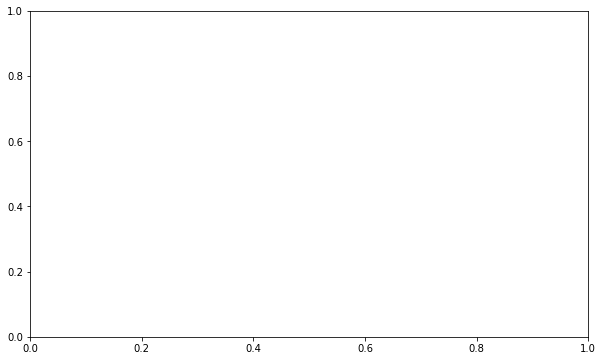

In [243]:
# make a subset that will call the year we want to visualise on the map
df_subset = df_long[df_long['Year'] == '2014']

# set the range for the choropleth
vmin, vmax = 50000, 2000000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
df_subset.plot(column='Population', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now customise and add annotations
# remove the axis
ax.axis('off')

# add a title
ax.set_title('Total Population of Uganda', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('Source: African Open Data, 2018',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('testmap.png', dpi=300)

In [229]:
# look for something in our dataframe
search1 = df_long[df_long['Year'] == '2014']
#search1

#search2 = df_long[(df_long['Year'] == '2014') & (df_long['Year'] == '2014')]
#

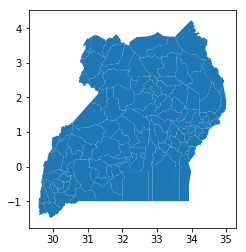

In [226]:
#df_adm_bounds.plot()

# We restrict to South America.
#ax = df_bounds['2014'] #.plot()
   # color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
df_bounds.plot()
   # ax=ax, color='red')

#plt.show()

In [192]:
test = search1.groupby('SUBREGION', as_index=False)['Population'].sum()
#test.reset_index(inplace=True)


#df.set_index('Date', inplace=True)
#df.groupby('ticker')['adj_close']

TypeError: Empty 'DataFrame': no numeric data to plot